In [1]:
import numpy as np
import random

# Generate random data as a list first
data_list = [random.uniform(-1000, 1000) for _ in range(20)]

labels_list = [1 if i > 0 else 0 for i in data_list]

# convert to numpy arrays with proper shapes
X = np.array(data_list).reshape(1, -1)  
y = np.array(labels_list)

In [39]:
class Perceptron:
    # alpha = learning rate
    def __init__(self, alpha, n_iter):
        self.alpha = alpha
        self.n_iter = n_iter

    def fit(self, X, y):
        # number of weights = number of inputs
        # in this case 20
        n_samples, n_features = X.shape
        self.w_ = np.random.rand(n_features)
        self.b_ = 0.
        self.errors_ = []

        for _ in range(self.n_iter):
            error = 0
            # target_y = actual label
            for xi, target_y in zip(X, y):
                update_value = self.alpha * (target_y - self.predict(xi))
                self.w_ += update_value * xi
                self.b_ += update_value

                if update_value != 0.0:
                    error += update_value
            self.errors_.append(error)
        return self            

    def weighted_sum(self, X):
        return np.dot(X, self.w_) + self.b_
    # x = new point i want to classify
    def predict(self, X):
        return np.where(self.weighted_sum(X) >= 0.0, 1, 0)


    

In [4]:
# USING THE PERCEPTRON ON THE IRIS DATASET
import os
import pandas as pd


In [7]:
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('From URL:', s)
df = pd.read_csv(s, header=None, encoding='utf-8')
df.head()

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [59]:
X = df.drop(columns=[4])
y = df[4]
X_arr = np.array(X)
y_arr = np.array(y)


In [61]:
X_arr.shape

(150, 4)

In [66]:
y_arr.shape

(150,)

In [62]:
# y needs to be encoded
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_arr = le.fit_transform(y_arr)

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_arr, y_arr, test_size=0.1, random_state=42)

In [71]:
#X_train = np.reshape(X_train, (1, -1))
X_train.shape

(135, 4)

In [72]:
#X_test = np.reshape(X_test, (1, -1))
X_test.shape

(15, 4)

In [78]:
perceptron = Perceptron(0.01, 1000)
perceptron.fit(X_train, y_train)

In [79]:
y_pred = perceptron.predict(X_test)

In [80]:
y_test.shape

(15,)

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.40      1.00      0.57         6
           2       0.00      0.00      0.00         3

    accuracy                           0.40        15
   macro avg       0.13      0.33      0.19        15
weighted avg       0.16      0.40      0.23        15



c:\Users\user\anaconda3\envs\pyml\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\anaconda3\envs\pyml\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\anaconda3\envs\pyml\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


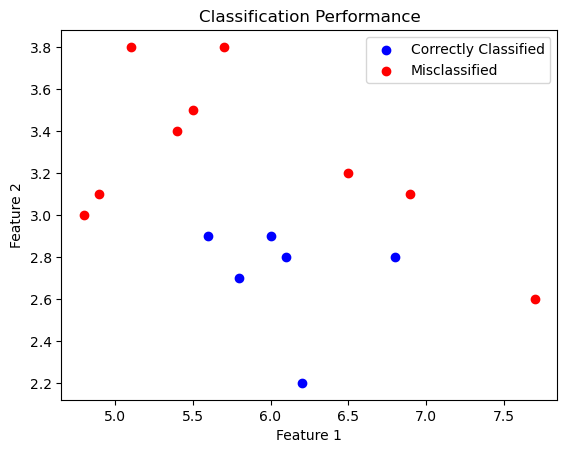

In [82]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_test is 2D (n_samples, 2) for visualization purposes
# If X_test has more than 2 features, select the first two for plotting
X_test_2D = X_test[:, :2]  # Select the first two features

# Identify correctly and incorrectly classified points
correct = y_test == y_pred
incorrect = y_test != y_pred

# Plot correctly classified points in blue
plt.scatter(X_test_2D[correct, 0], X_test_2D[correct, 1], color='blue', label='Correctly Classified')

# Plot misclassified points in red
plt.scatter(X_test_2D[incorrect, 0], X_test_2D[incorrect, 1], color='red', label='Misclassified')

# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Classification Performance')
plt.legend()
plt.show()